# Network of Words

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize,sent_tokenize,Text,PorterStemmer,WordNetLemmatizer,pos_tag
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
import spacy
from spellchecker import SpellChecker
import collections as clt
import time
from community import best_partition
import pickle
import math

In [2]:
df = pd.read_csv('reviews_full_v5.csv')
plt.rcParams["figure.figsize"] = (10,7) #defining size of plots
sp = spacy.load('en_core_web_sm')

In [3]:
genre_group = pickle.load(open('genre_group.p','rb'))

In [4]:
def isNaN(x):
    return x != x

In [5]:
#nx.write_gpickle(B,'bipartite_words.p')

In [6]:
#nx.write_gpickle(G,'network_words.p')

In [7]:
vocab = set(open('vocab_list.txt', 'r').read().split('\n'))

In [8]:
G = nx.read_gpickle('network_words.p')
B = nx.read_gpickle('bipartite_words.p')

In [9]:
G.number_of_nodes(), B.number_of_nodes(), len(vocab)

(16033, 45464, 16034)

In [10]:
N_albums = B.number_of_nodes() - len(vocab)
N_albums

29430

In [11]:
len(set(df.Release))

40241

In [12]:
idf = pickle.load(open('IDF.p','rb'))
tf = pickle.load(open('TF.p','rb'))

In [13]:
genre = 'Black metal'
total = 0
tfidf = {}
tfidf[genre] = {}
for word in tf[genre]:
    total += tf[genre][word]
for word in tf[genre]:
    tfidf[genre][word] = (tf[genre][word] / total) * idf[word]

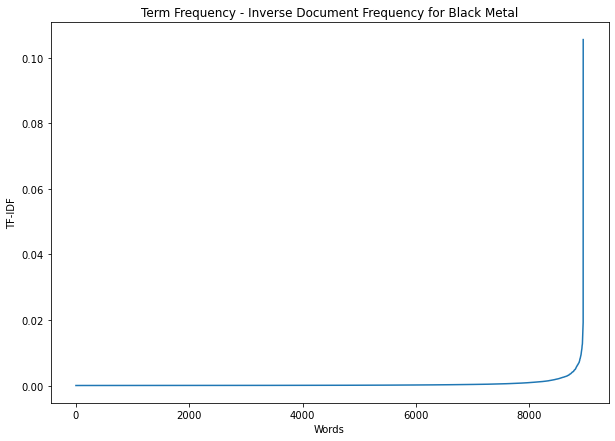

In [15]:
plt.title('Term Frequency - Inverse Document Frequency for Black Metal')
plt.ylabel('TF-IDF')
plt.xlabel('Words')
plt.plot(sorted(list(tfidf[genre].values())))
plt.savefig('TF-IDF of Black Metal.png')

In [26]:
print([key for key in tfidf[genre] if tfidf[genre][key] > 0.01])

['heavy', 'melodic', 'excellent', 'great', 'early', 'unique', 'black', 'overall', 'atmospheric', 'musical', 'different', 'extreme', 'ambient', 'entire', 'strong', 'clear', 'harsh', 'simple', 'clean', 'original', 'vocal', 'second', 'similar', 'little', 'previous', 'short', 'powerful', 'acoustic', 'interesting', 'beautiful', 'album', 'norwegian', 'perfect', 'symphonic', 'depressive']
